In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd
from scipy.stats import linregress


15372
8385
1355


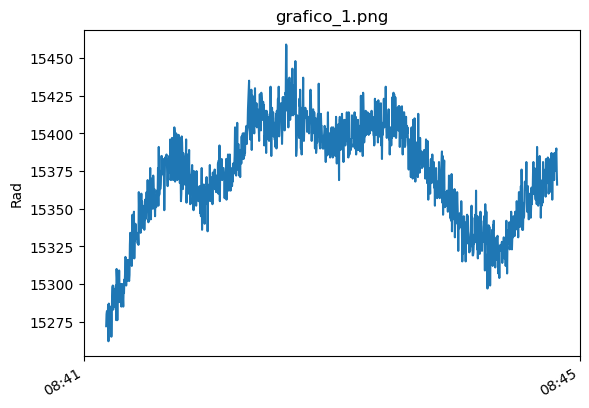

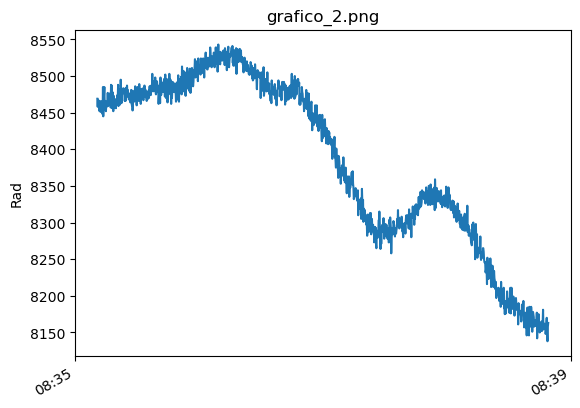

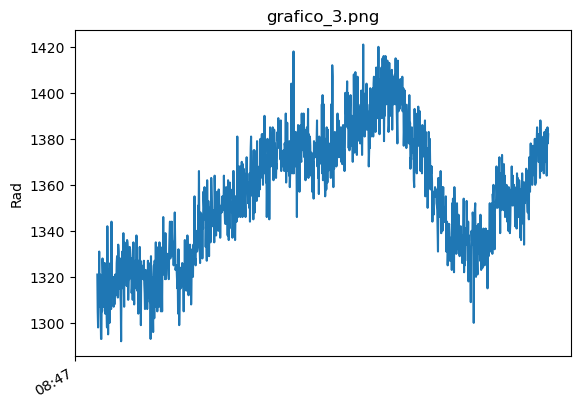

In [99]:
files_calibrazione = np.array(['dati/cal_g5_z6877_amb.txt', 'dati/Cal_G5_Z8900_amb.txt', 'dati/Cal_G5_z10923_amb.txt'])

titolo_grafici = np.array(['grafico_1.png', 'grafico_2.png', 'grafico_3.png'])
media = np.array ([0,0,0])

for i in range(0,3):
    calibrazione_1 = pd.read_csv (files_calibrazione[i],
                                    sep = ' ',
                                    header=None,
                                    skiprows=10,
                                    decimal='.',
                                    names=['data','ora','rad','temperatura'])
    
    calibrazione_1['data_ora'] = calibrazione_1['data'].map(str) + ' ' + calibrazione_1['ora'].map(str)
    calibrazione_1['data_ora'] = pd.to_datetime(calibrazione_1['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
    calibrazione_1 = calibrazione_1.iloc[:,[-1,2,3]]
    
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    ax.plot(calibrazione_1['data_ora'],calibrazione_1['rad'], label='temp')
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(MinuteLocator(interval = 15))

    plt.title(titolo_grafici[i])
    plt.ylabel('Rad')

    plt.savefig(titolo_grafici[i])
    
    media[i] = calibrazione_1.rad.mean()
    print(media[i])

In [100]:
print(media)

[15372  8385  1355]


Text(0.5, 0, 'offset')

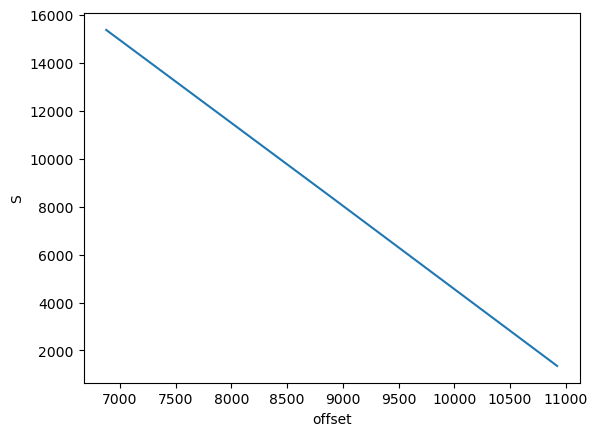

In [101]:
zero_base = np.array([6877, 8900, 10923])

plt.plot(zero_base, media)
plt.ylabel('S')
plt.xlabel('offset')


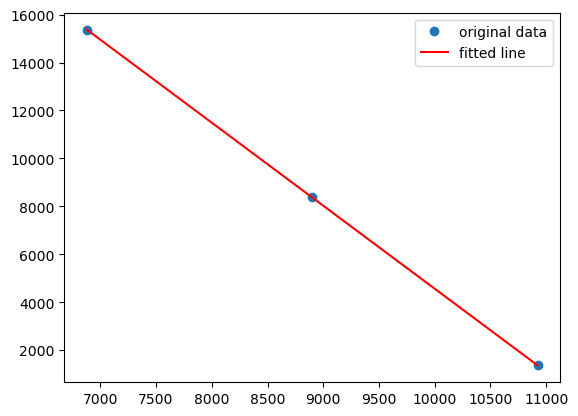

In [102]:
res = linregress(zero_base,media) #x and y are arrays or lists.

plt.plot(zero_base, media, 'o', label='original data')
plt.plot(zero_base, res.intercept + res.slope*(zero_base), 'r', label='fitted line')
plt.legend()
plt.show()